In [ ]:
import pandas as pd 

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import pandas.util.testing as tm


In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv('udemy_courses.csv')

In [ ]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
df.shape


(3678, 12)

In [ ]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
df=df.drop(['course_id','url'],axis=1)

In [ ]:
dup=df[df.duplicated()]
dup.shape

(6, 10)

In [ ]:
df=df.drop_duplicates()
df.shape

(3672, 10)

In [ ]:
df.count()

course_title           3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
dtype: int64

In [ ]:
df=df.dropna()


In [ ]:
df.count()

course_title           3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
dtype: int64

In [ ]:
df["year"]=pd.to_datetime(df['published_timestamp']).dt.year

In [ ]:
df['year'][:5]

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year, dtype: int64

In [ ]:
df.count()

course_title           3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
year                   3672
dtype: int64

In [ ]:
df=df.drop(['published_timestamp','level','num_reviews'],axis=1)

In [ ]:
df.count()

course_title        3672
is_paid             3672
price               3672
num_subscribers     3672
num_lectures        3672
content_duration    3672
subject             3672
year                3672
dtype: int64

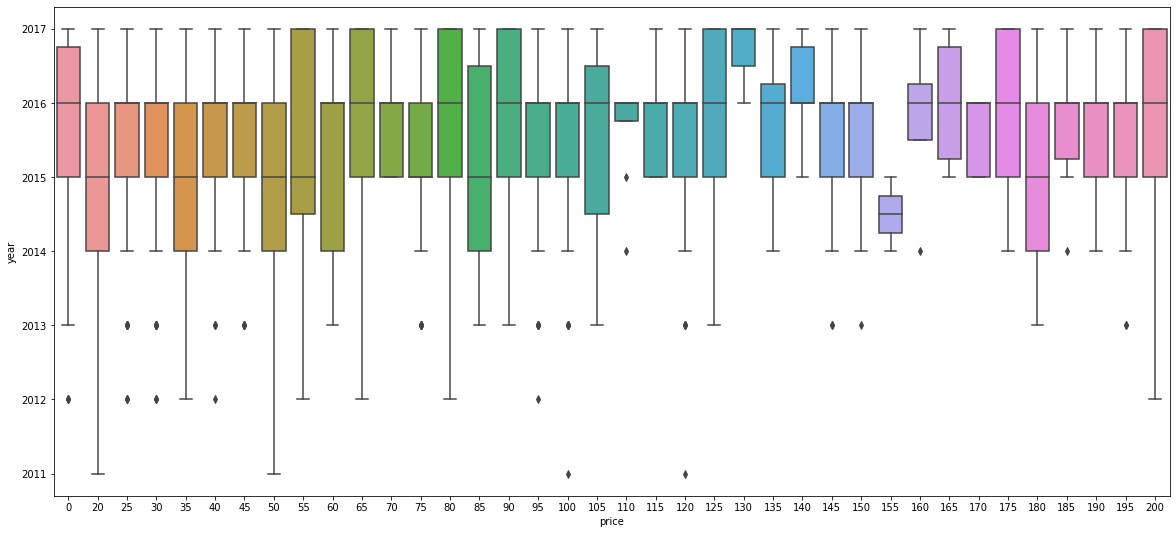

In [ ]:
plt.figure(figsize=(20,9))

sns.boxplot(x="price",y="year",data=df)

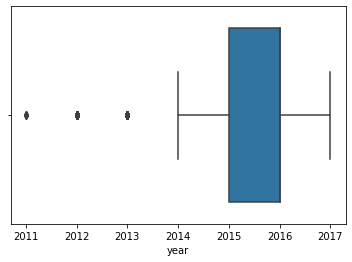

In [ ]:
sns.boxplot(x=df['year'])

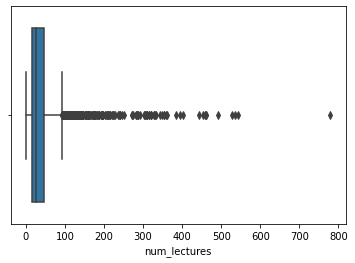

In [ ]:
sns.boxplot(x=df['num_lectures'])

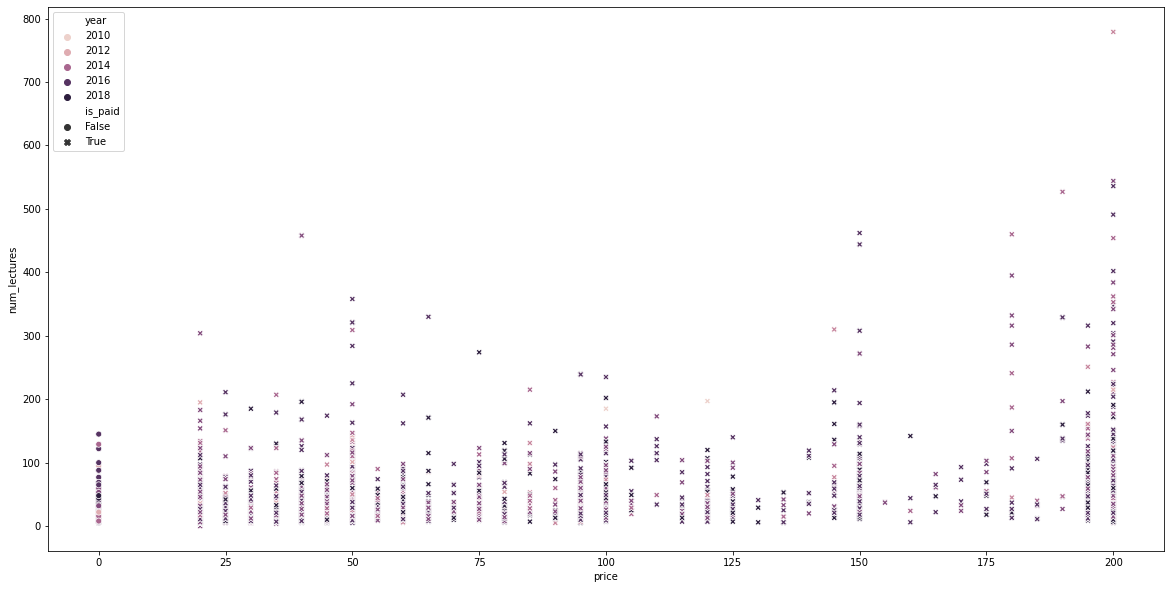

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="price", y="num_lectures",
                     hue="year", style="is_paid", data=df)

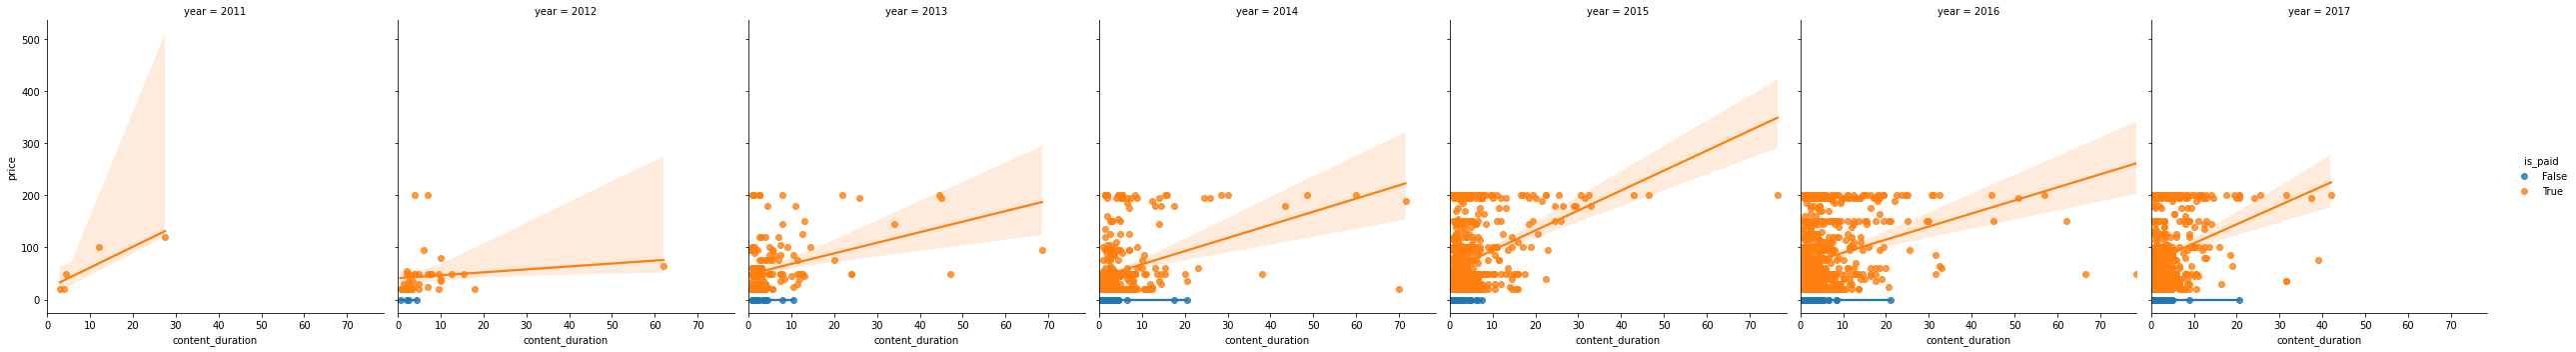

In [ ]:
sns.lmplot(x="content_duration", y="price", col="year", hue="is_paid",
           data=df);

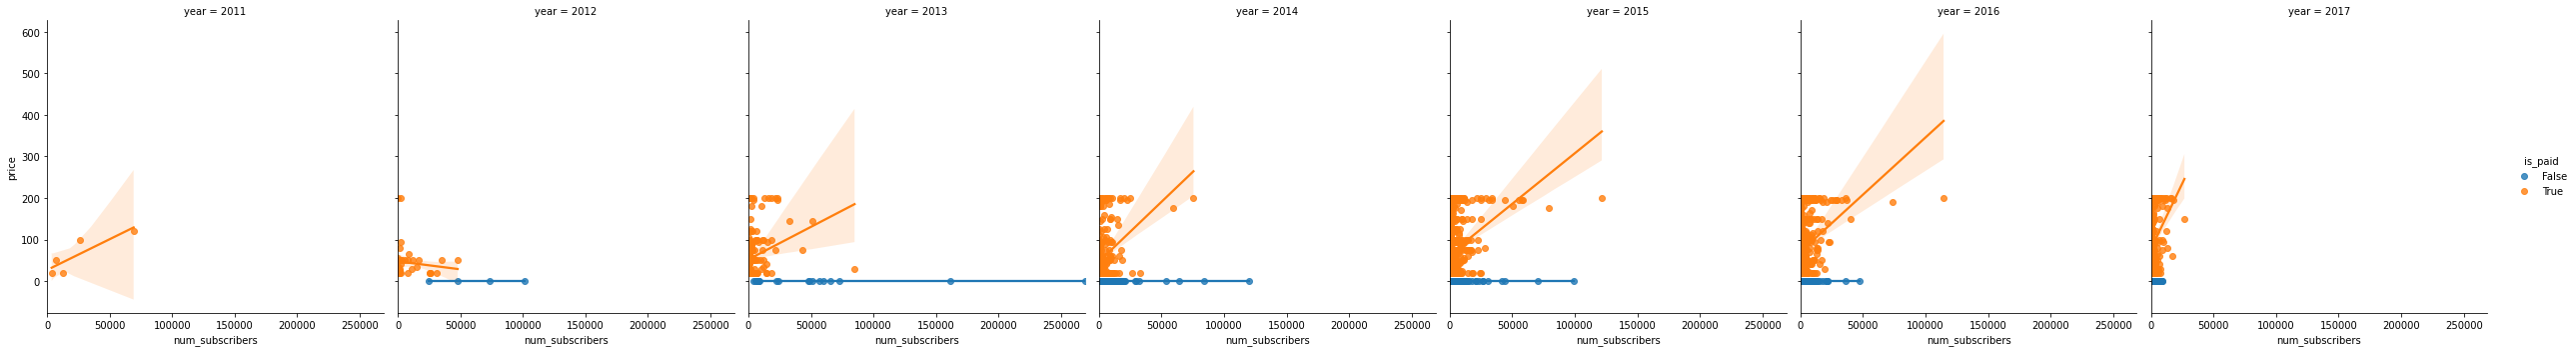

In [ ]:
sns.lmplot(x="num_subscribers", y="price", col="year", hue="is_paid",
           data=df);

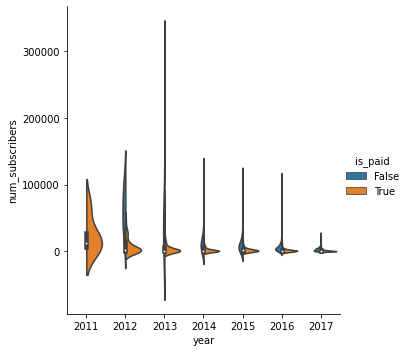

In [ ]:
sns.catplot(x="year", y="num_subscribers", hue="is_paid",
            kind="violin", split=True, data=df);

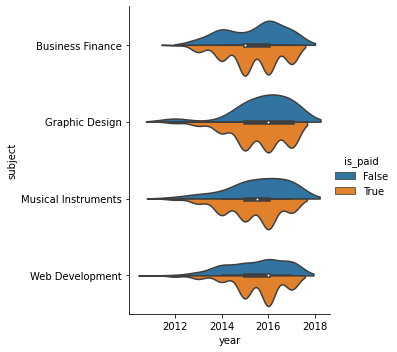

In [ ]:
sns.catplot(x="year", y="subject", hue="is_paid",
            kind="violin", split=True, data=df);

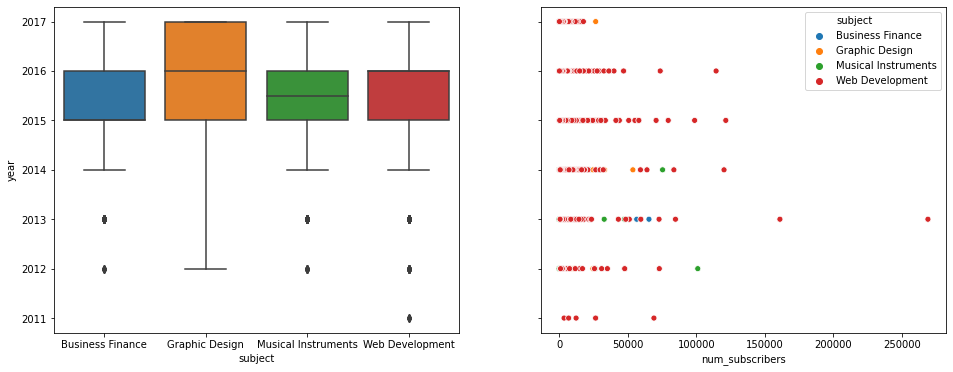

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
sns.boxplot(x="subject", y="year", data=df, ax=axes[0])
sns.scatterplot(x="num_subscribers", y="year", hue="subject", data=df, ax=axes[1]);

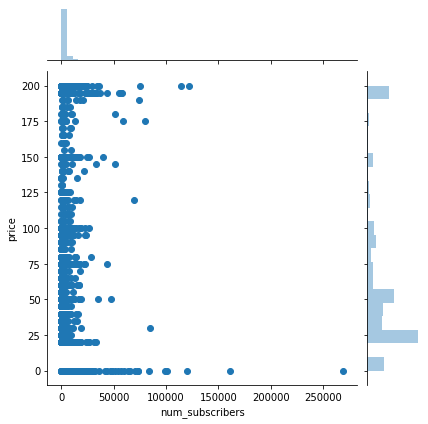

In [ ]:
sns.jointplot(x="num_subscribers", y="price", data=df);


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


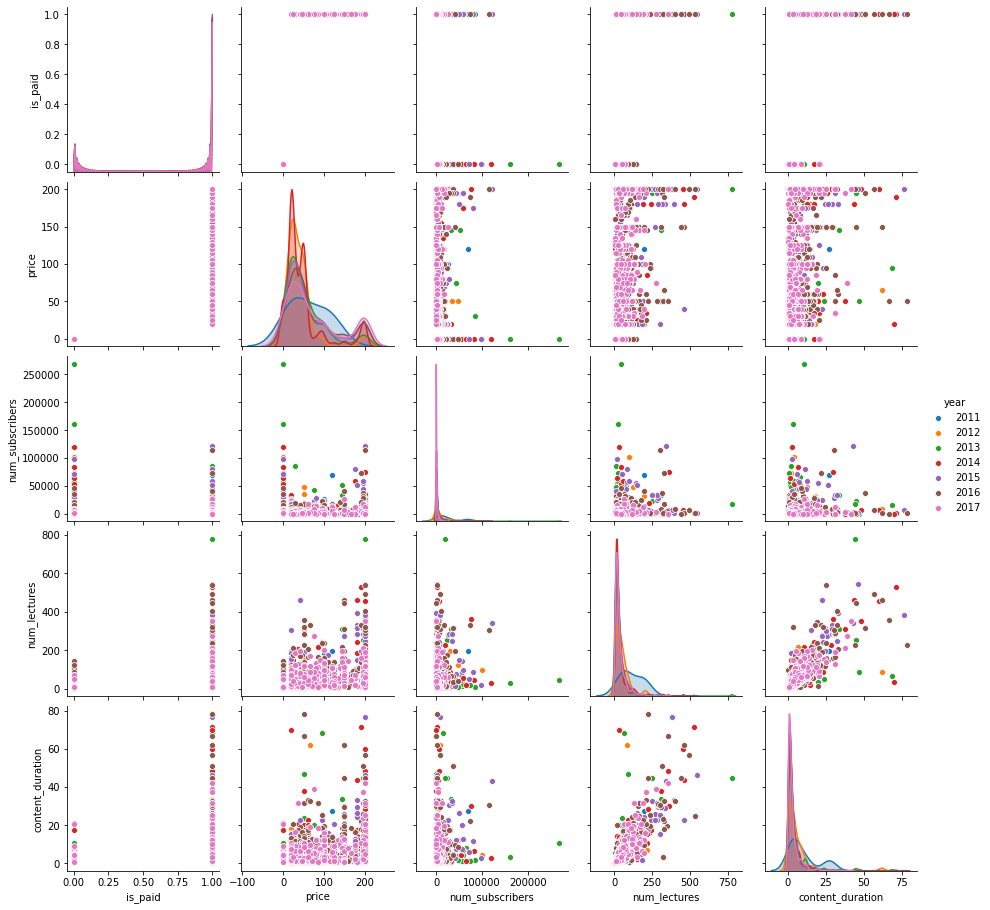

In [ ]:
sns.pairplot(data=df, hue="year");


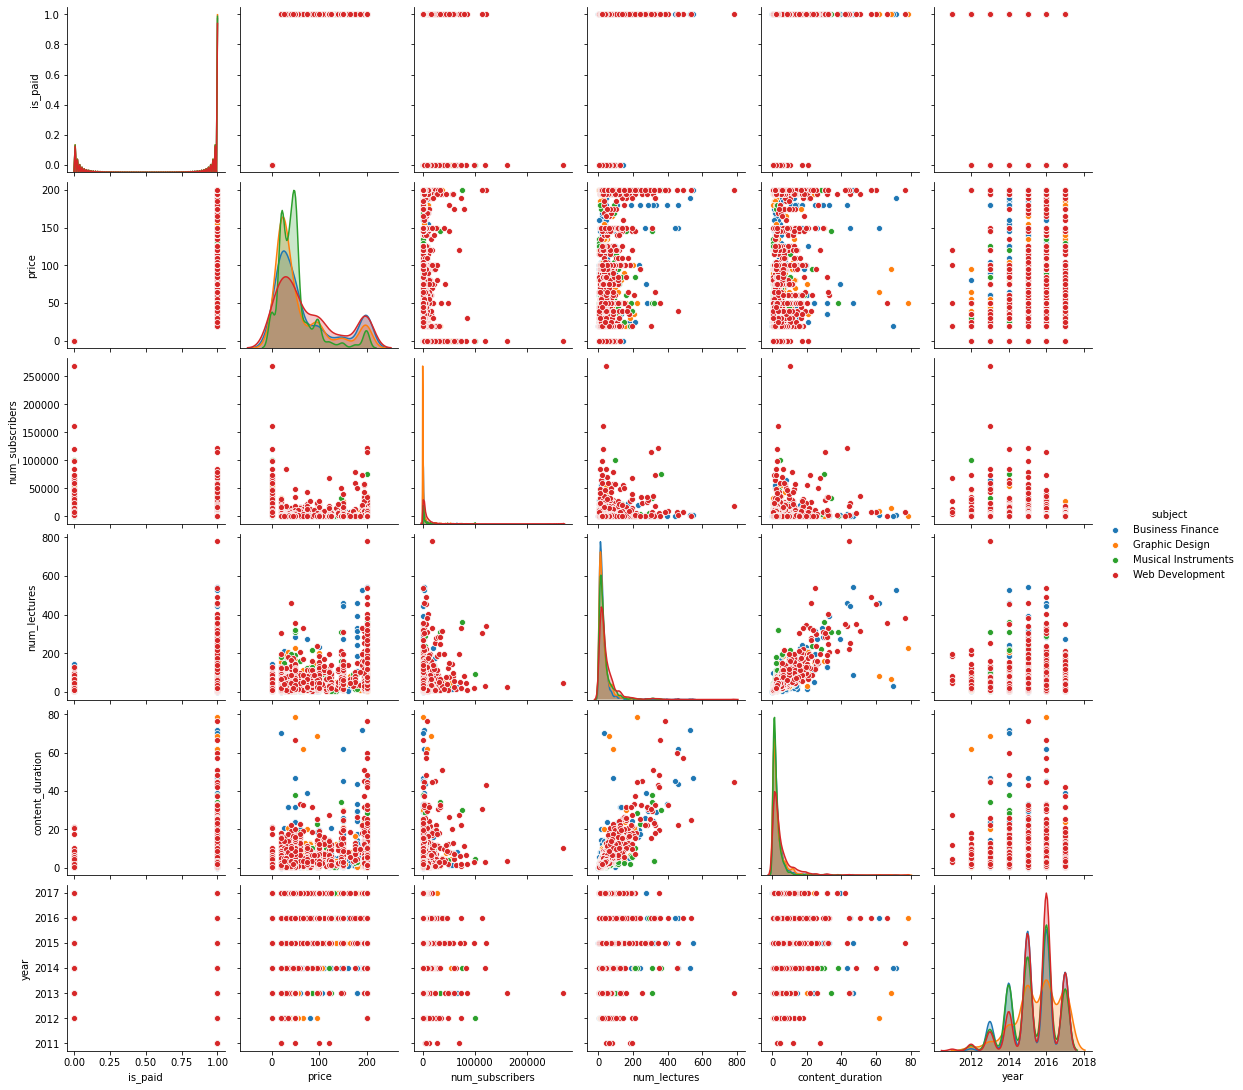

In [ ]:
sns.pairplot(data=df, hue="subject");


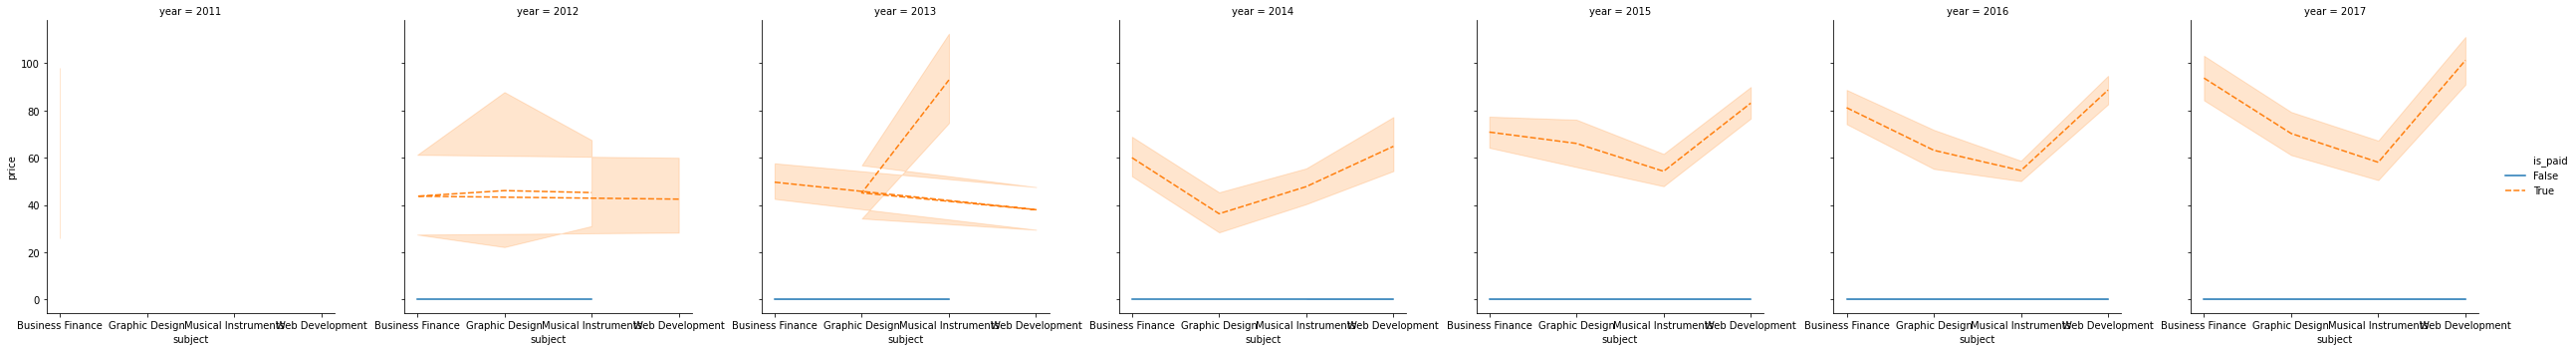

In [ ]:
sns.relplot(x="subject", y="price", col="year",
            hue="is_paid", style="is_paid",
            kind="line", data=df);

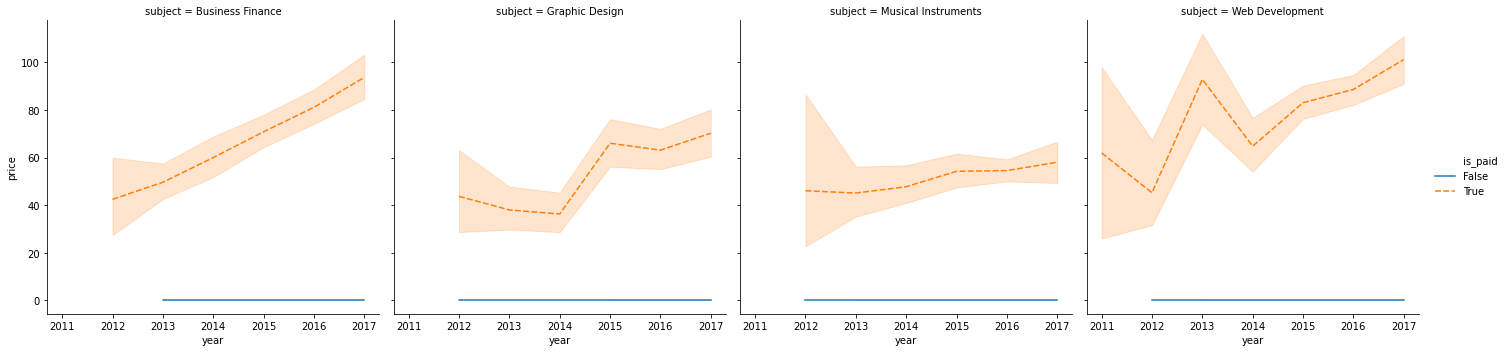

In [ ]:
sns.relplot(x="year", y="price", col="subject",
            hue="is_paid", style="is_paid",
            kind="line", data=df);

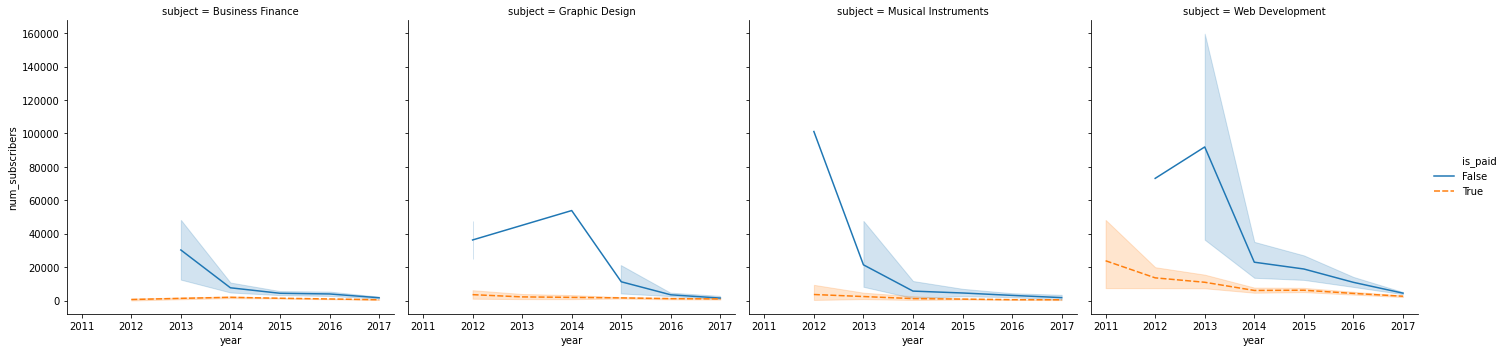

In [ ]:
sns.relplot(x="year", y="num_subscribers", col="subject",
            hue="is_paid", style="is_paid",
            kind="line", data=df);

,is_paid,price,num_subscribers,num_lectures,content_duration,year
is_paid,1.000000,0.328910,-0.267056,0.112788,0.094594,-0.017662
price,0.328910,1.000000,0.050436,0.329944,0.293200,0.133654
num_subscribers,-0.267056,0.050436,1.000000,0.158351,0.162118,-0.182697
num_lectures,0.112788,0.329944,0.158351,1.000000,0.801624,-0.025243
content_duration,0.094594,0.293200,0.162118,0.801624,1.000000,-0.058824
year,-0.017662,0.133654,-0.182697,-0.025243,-0.058824,1.000000


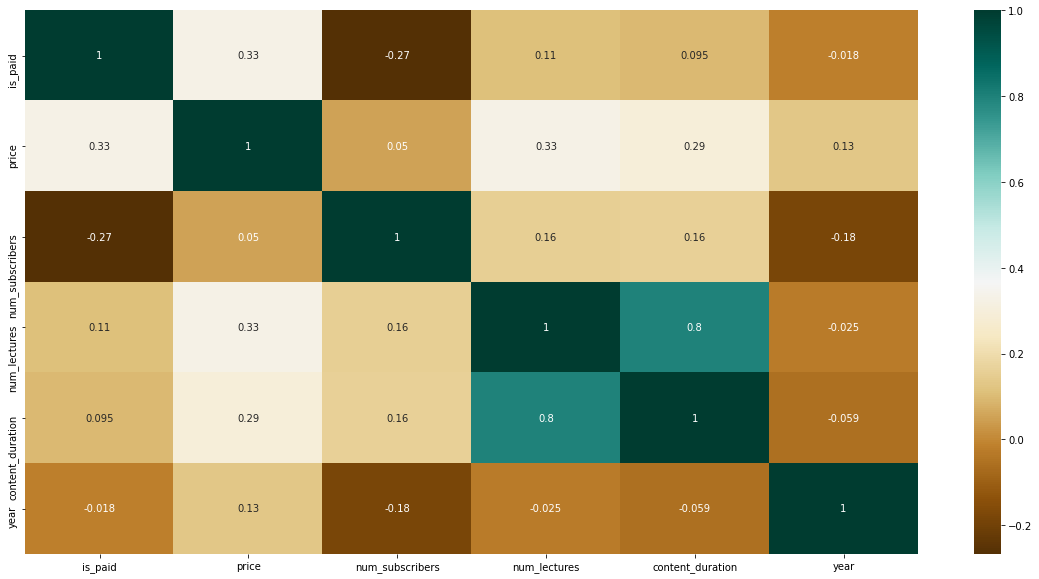

In [ ]:
plt.figure(figsize=(20,10))
d=df.corr()
sns.heatmap(d,cmap="BrBG",annot=True)
d

In [ ]:
agg1=df.groupby(['year']).num_subscribers.agg(['count','min','max','mean'])

In [ ]:
agg1

,count,min,max,mean
year,,,,
2011,5,3697,69186,23805.600000
2012,45,29,101154,12340.866667
2013,201,7,268923,8358.970149
2014,490,0,120291,3939.604082
2015,1014,0,121584,3427.341223
2016,1204,0,114512,2463.990033
2017,713,0,26742,1387.014025


,count,min,max,mean
count,1.000000,-0.489209,-0.156246,-0.774901
min,-0.489209,1.000000,-0.283275,0.880675
max,-0.156246,-0.283275,1.000000,-0.053958
mean,-0.774901,0.880675,-0.053958,1.000000


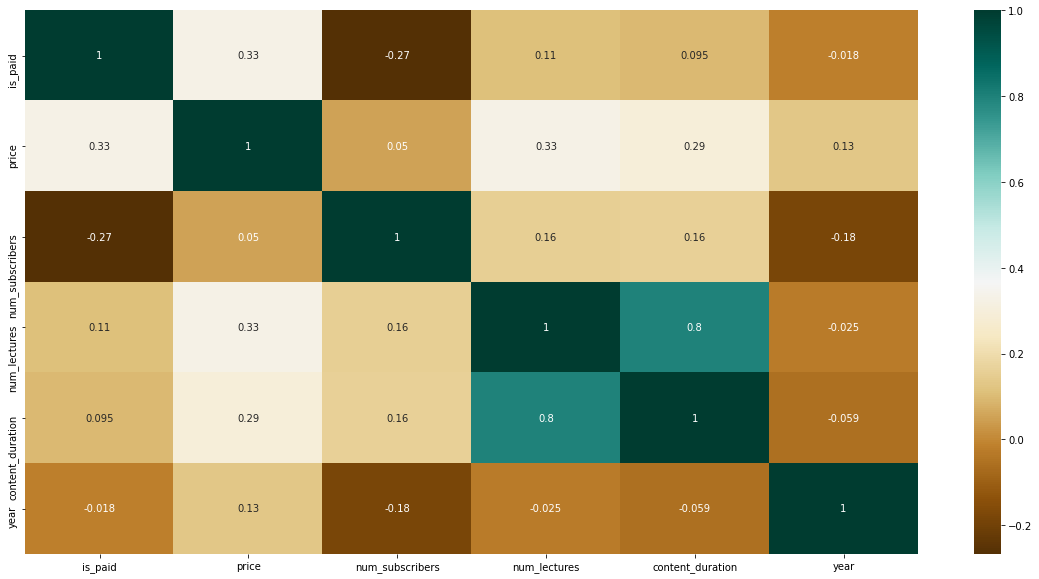

In [ ]:
plt.figure(figsize=(20,10))
a=agg1.corr()
sns.heatmap(d,cmap="BrBG",annot=True)
a

In [ ]:
 df1=pd.read_csv('bigmart_data1.csv')

In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,year,level,Outlet_Location_Type,Outlet_Type,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2015,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2015,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2014,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,2011,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df1.shape

(8523, 12)

In [ ]:
dup1=df1[df1.duplicated()]
dup1.shape

(0, 12)

In [ ]:

df1=df1.drop_duplicates()
df1.shape

(8523, 12)

In [ ]:
df1=df1.dropna()


In [ ]:
df1.shape

(4650, 12)

In [ ]:
df1.rename(columns = {'Sales':'num_subscribers'}, inplace = True) 

In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,year,level,Outlet_Location_Type,Outlet_Type,num_subscribers
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,2015,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,2015,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,2011,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2018,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
df1=df1.drop(['Item_Visibility','level','Outlet_Location_Type','Outlet_Type','Outlet_Identifier'],axis=1)

In [ ]:
df1.count()

Item_Identifier     4650
Item_Weight         4650
Item_Fat_Content    4650
Item_Type           4650
Item_MRP            4650
year                4650
num_subscribers     4650
dtype: int64

,Item_Weight,Item_MRP,year,num_subscribers
Item_Weight,1.000000,0.033330,-0.010301,0.010972
Item_MRP,0.033330,1.000000,0.006415,0.679594
year,-0.010301,0.006415,1.000000,-0.012501
num_subscribers,0.010972,0.679594,-0.012501,1.000000


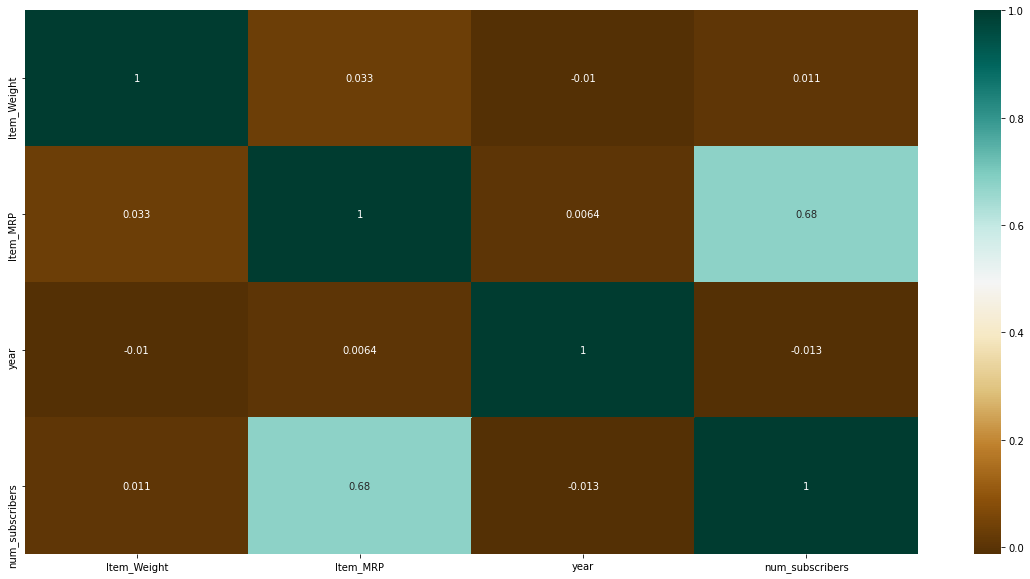

In [ ]:
plt.figure(figsize=(20,10))
b=df1.corr()
sns.heatmap(b,cmap="BrBG",annot=True)
b

<Figure size 14400x1440 with 0 Axes>

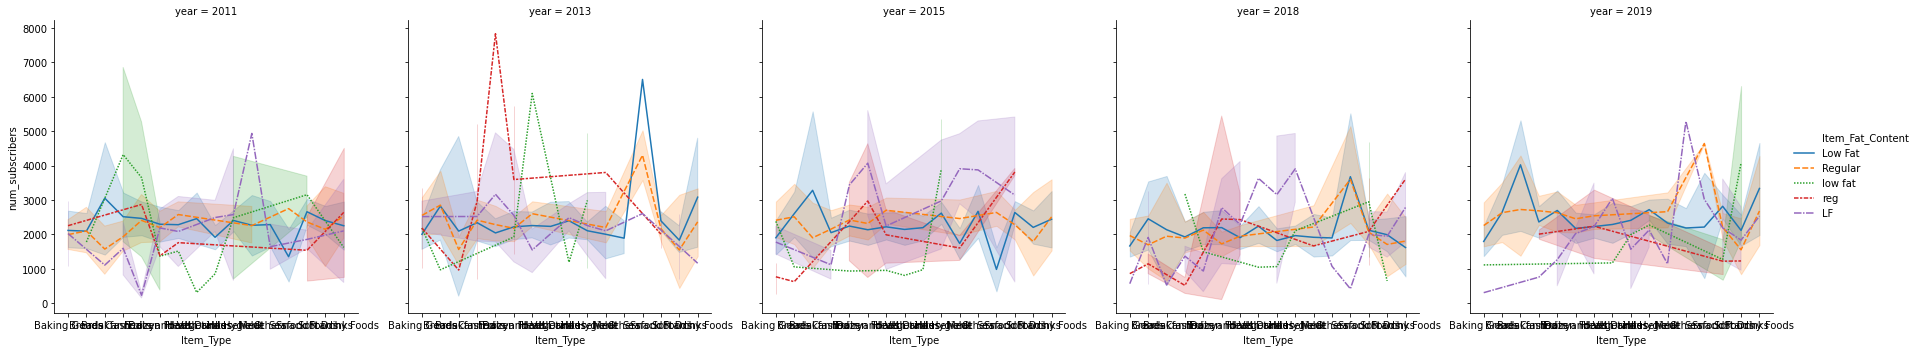

In [ ]:
plt.figure(figsize=(200,20))

sns.relplot(x="Item_Type", y="num_subscribers", col="year",
            hue="Item_Fat_Content", style="Item_Fat_Content",
            kind="line", data=df1);

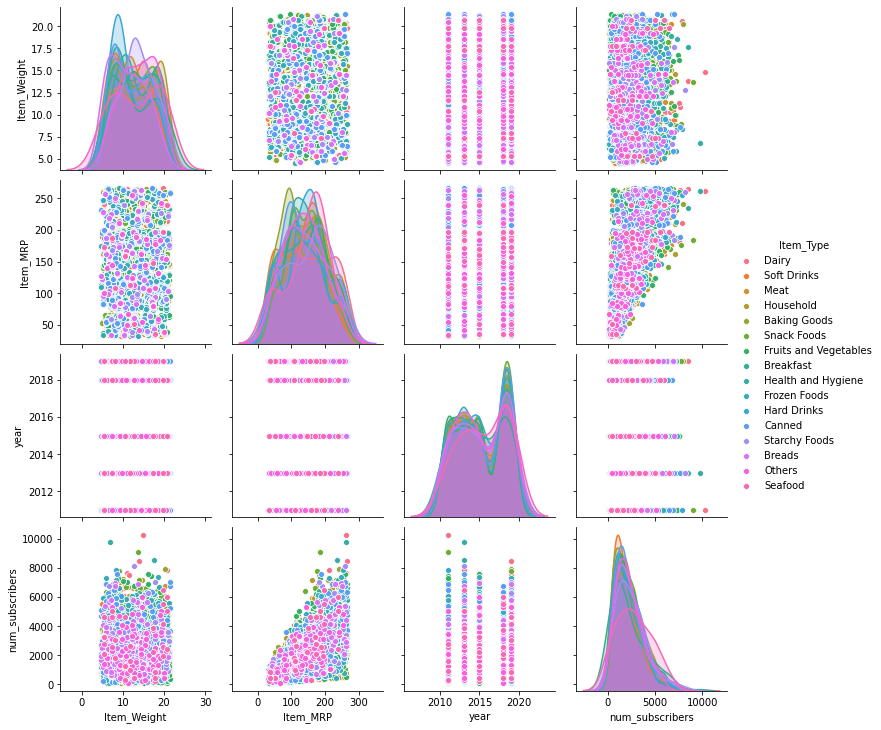

In [ ]:

sns.pairplot(data=df1, hue="Item_Type");


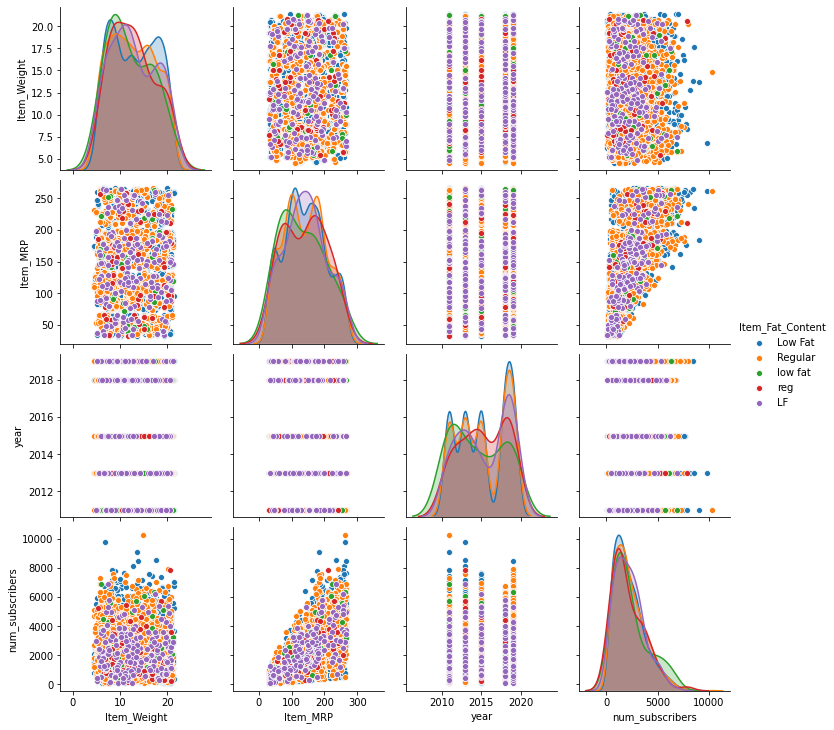

In [ ]:
sns.pairplot(data=df1, hue="Item_Fat_Content");


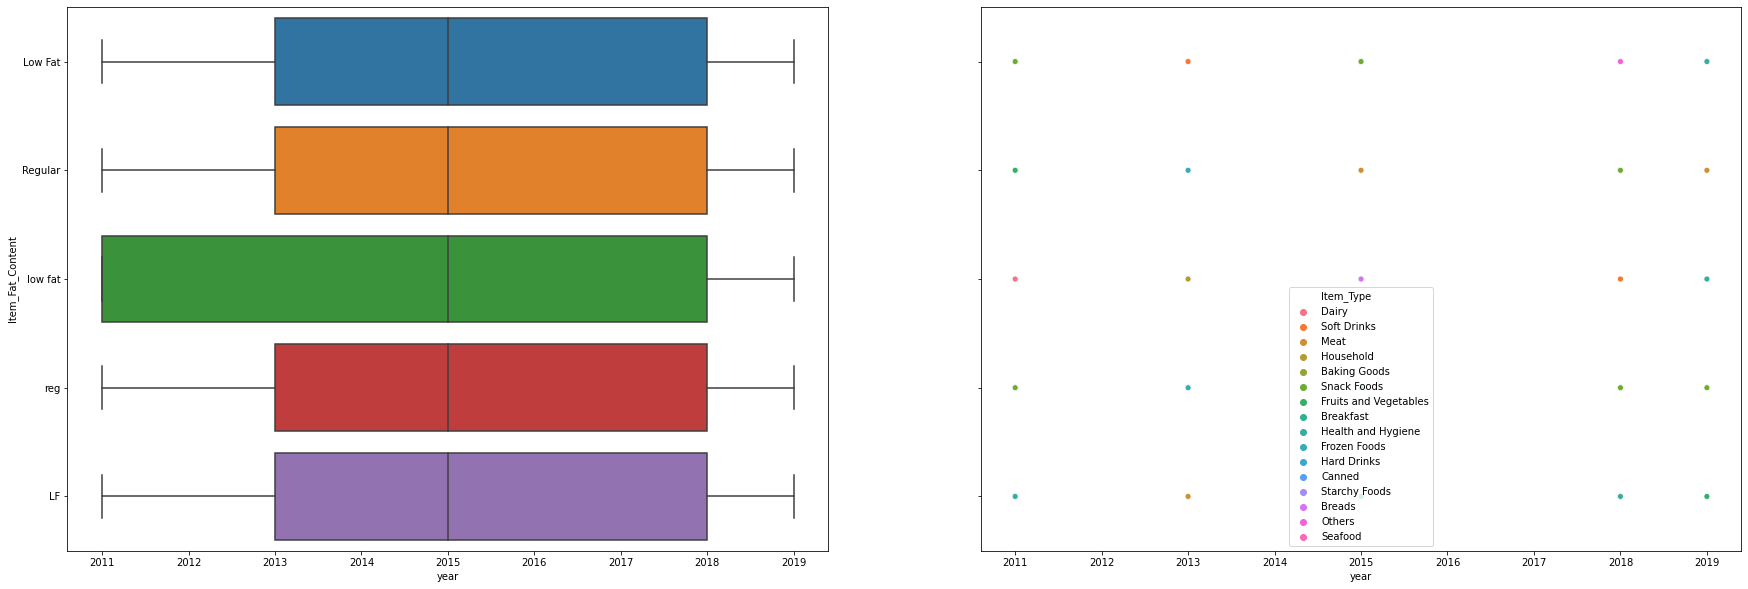

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(30,10))
sns.boxplot(x="year", y="Item_Fat_Content", data=df1, ax=axes[0])
sns.scatterplot(x="year", y="Item_Fat_Content", hue="Item_Type", data=df1, ax=axes[1]);

In [ ]:
agg2=df1.groupby(['year']).num_subscribers.agg(['count','min','max','mean'])

In [ ]:
agg2

,count,min,max,mean
year,,,,
2011,932,73.2380,10256.6490,2298.995256
2013,930,101.8674,9779.9362,2277.844267
2015,930,111.8544,7646.0472,2348.354635
2018,928,69.2432,6768.5228,1995.498739
2019,930,113.8518,8479.6288,2438.841866


In [ ]:
mrg=pd.merge(agg1, agg2, on='year')

In [ ]:
mrg.head()

,count_x,min_x,max_x,mean_x,count_y,min_y,max_y,mean_y
year,,,,,,,,
2011,5,3697,69186,23805.600000,932,73.2380,10256.6490,2298.995256
2013,201,7,268923,8358.970149,930,101.8674,9779.9362,2277.844267
2015,1014,0,121584,3427.341223,930,111.8544,7646.0472,2348.354635


,count_x,min_x,max_x,mean_x,count_y,min_y,max_y,mean_y
count_x,1.000000,-0.651418,-0.083529,-0.808661,-0.650172,0.818955,-0.999929,0.886618
min_x,-0.651418,1.000000,-0.701655,0.973112,0.999999,-0.968879,0.642339,-0.226649
max_x,-0.083529,-0.701655,1.000000,-0.518672,-0.702824,0.503446,0.095387,-0.534945
mean_x,-0.808661,0.973112,-0.518672,1.000000,0.972732,-0.999843,0.801600,-0.444895
count_y,-0.650172,0.999999,-0.702824,0.972732,1.000000,-0.968471,0.641080,-0.225050
min_y,0.818955,-0.968879,0.503446,-0.999843,-0.968471,1.000000,-0.812065,0.460688
max_y,-0.999929,0.642339,0.095387,0.801600,0.641080,-0.812065,1.000000,-0.892061
mean_y,0.886618,-0.226649,-0.534945,-0.444895,-0.225050,0.460688,-0.892061,1.000000


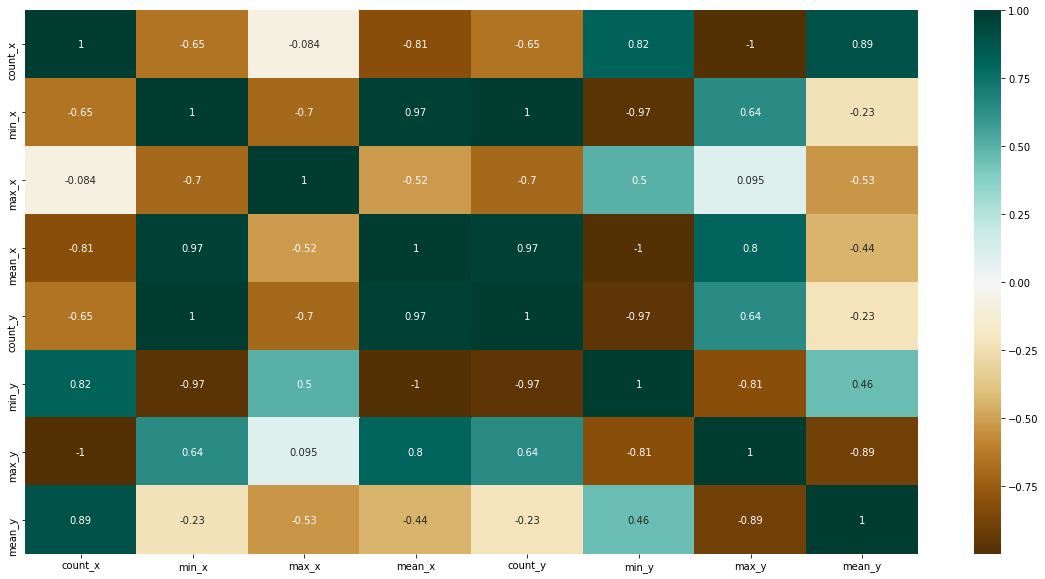

In [ ]:
plt.figure(figsize=(20,10))
mergeheat=mrg.corr()
sns.heatmap(mergeheat,cmap="BrBG",annot=True)
mergeheat

In [ ]:
df2=pd.merge(df, df1, on='year')

In [ ]:
df2.head()

,course_title,is_paid,price,num_subscribers_x,num_lectures,content_duration,subject,year,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,num_subscribers_y
0,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDA15,9.3,Low Fat,Dairy,249.8092,3735.1380
1,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDN15,17.5,Low Fat,Meat,141.6180,2097.2700
2,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDY07,11.8,Low Fat,Fruits and Vegetables,45.5402,1516.0266
3,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDX32,15.1,Regular,Fruits and Vegetables,145.4786,1589.2646
4,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDP49,9.0,Regular,Breakfast,54.3614,718.3982


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


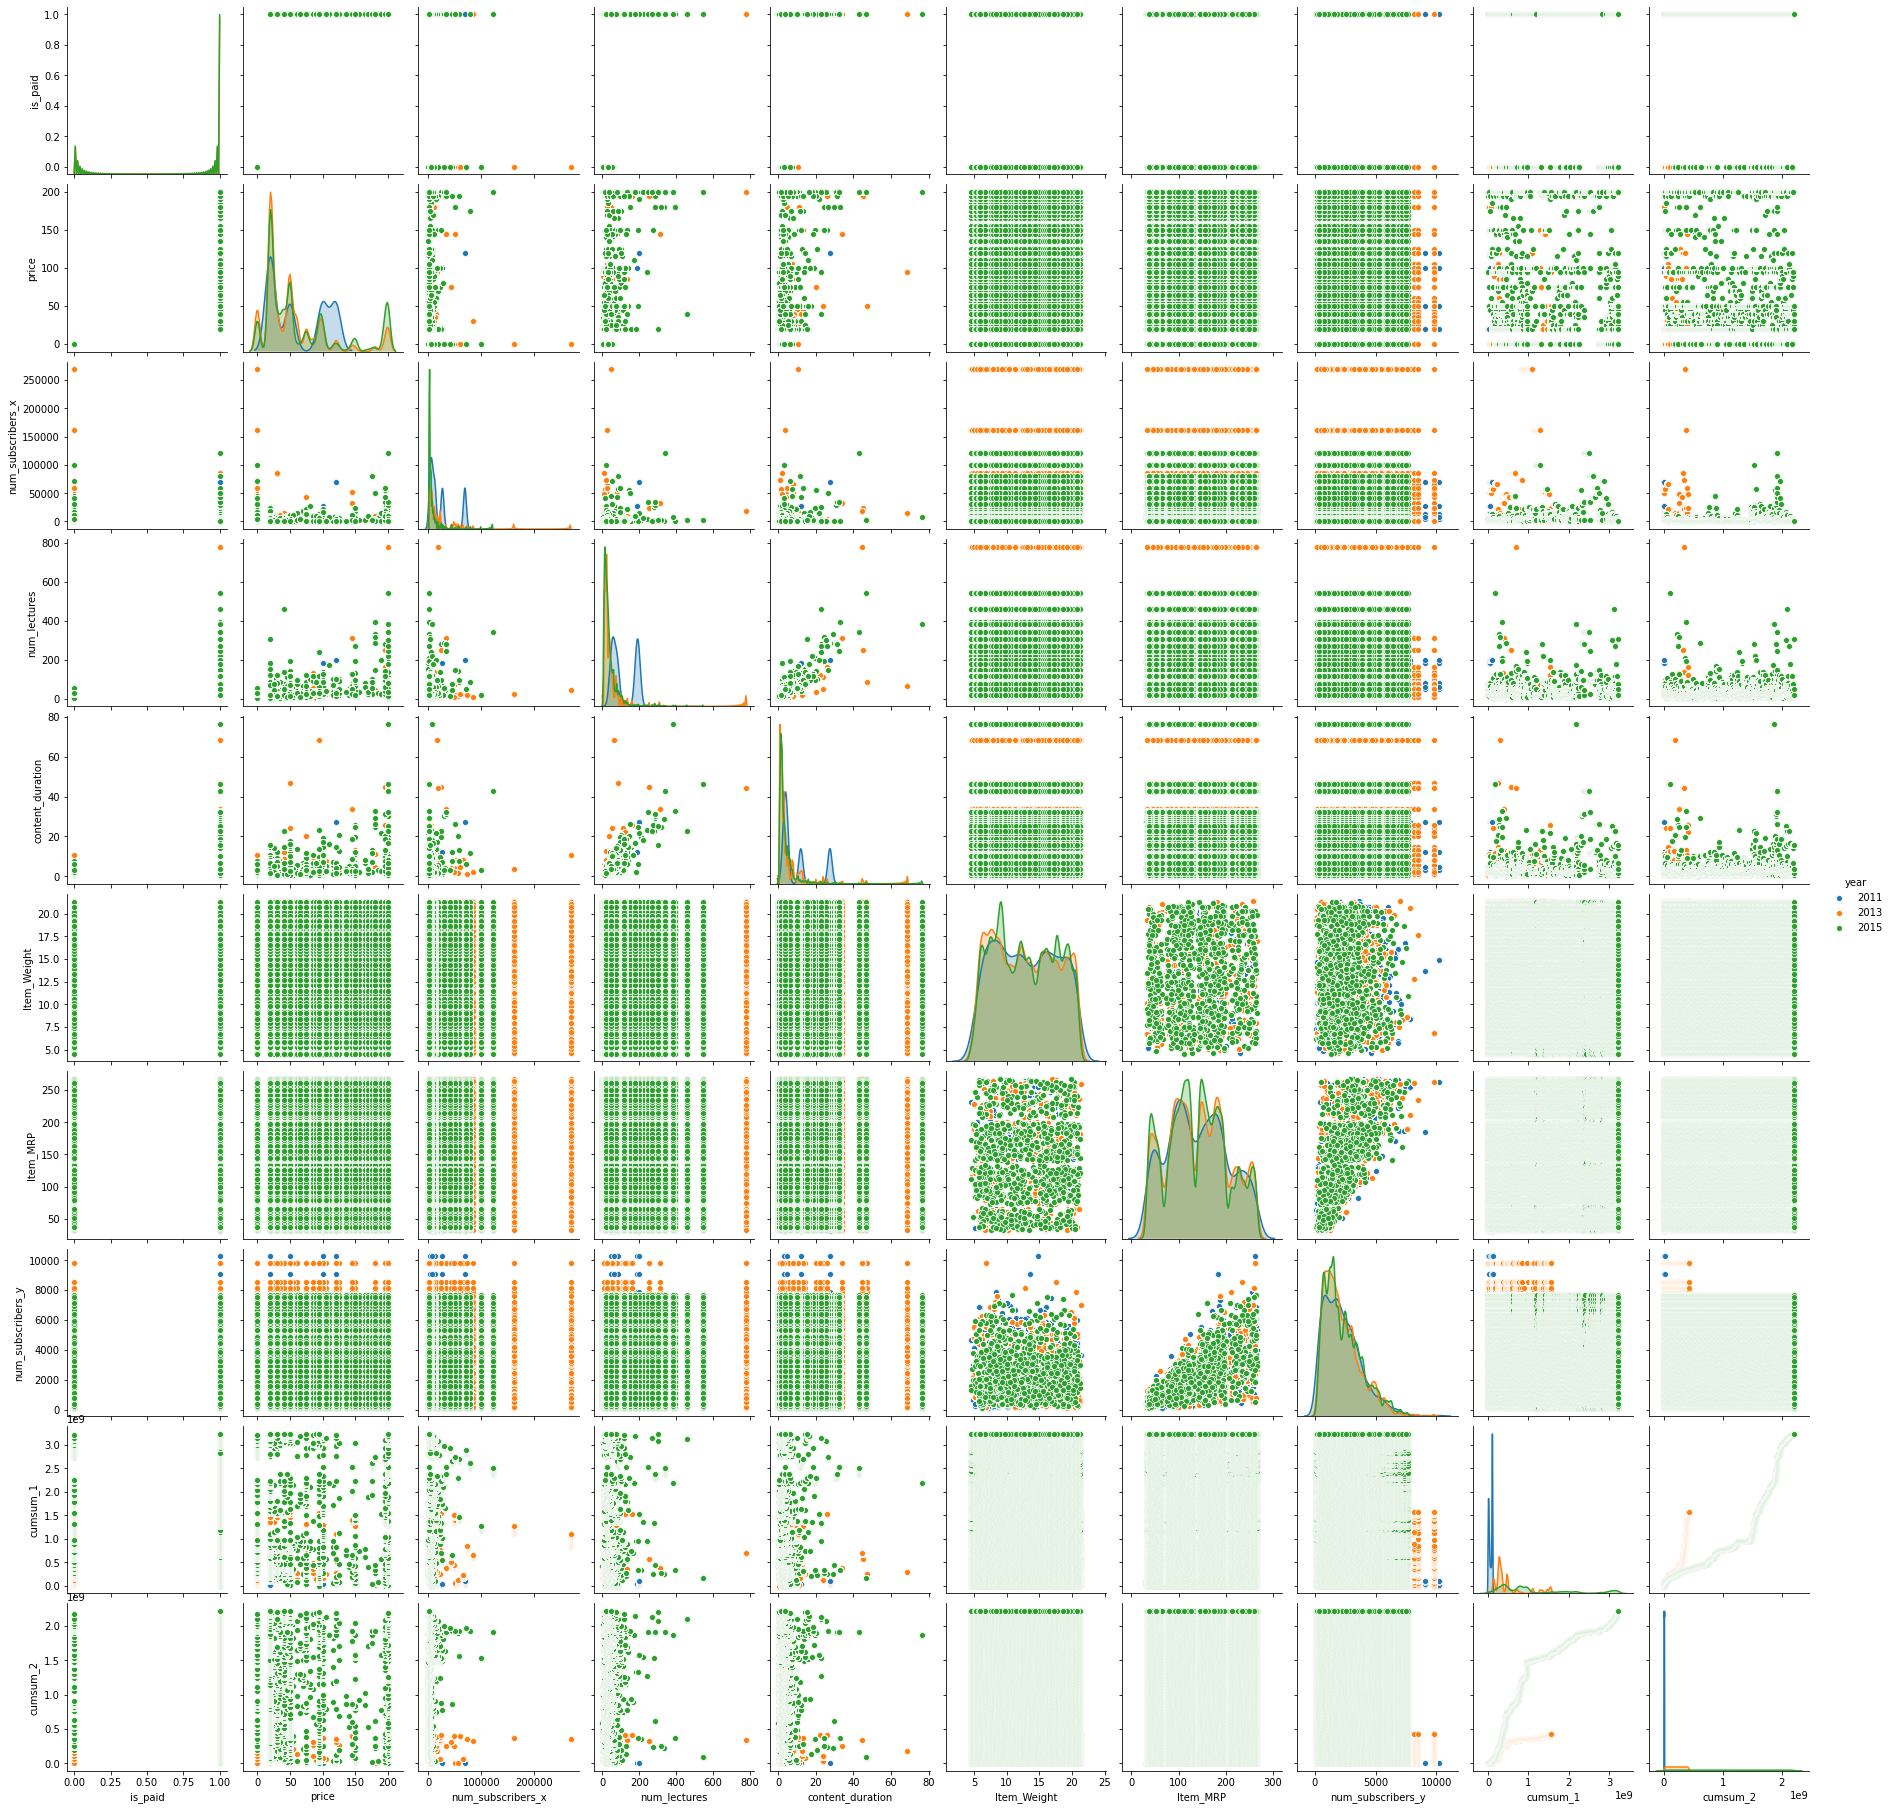

In [465]:
sns.pairplot(data=df2, hue="year");


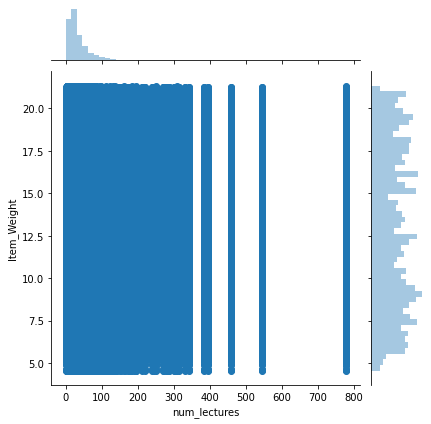

In [ ]:
sns.jointplot(x="num_lectures", y="Item_Weight", data=df2);


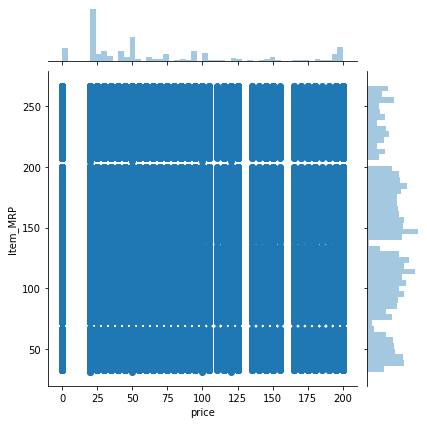

In [ ]:
sns.jointplot(x="price", y="Item_MRP", data=df2);


In [ ]:
df2['cumsum_1']=df2[['num_subscribers_x','year']].groupby('year').cumsum()
df2

,course_title,is_paid,price,num_subscribers_x,num_lectures,content_duration,subject,year,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,num_subscribers_y,cumsum_1
0,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDA15,9.300,Low Fat,Dairy,249.8092,3735.1380,2917
1,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDN15,17.500,Low Fat,Meat,141.6180,2097.2700,5834
2,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDY07,11.800,Low Fat,Fruits and Vegetables,45.5402,1516.0266,8751
3,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDX32,15.100,Regular,Fruits and Vegetables,145.4786,1589.2646,11668
4,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDP49,9.000,Regular,Breakfast,54.3614,718.3982,14585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134605,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,FDQ31,5.785,Regular,Fruits and Vegetables,85.9856,1494.0552,110906040
1134606,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,FDJ32,10.695,Low Fat,Fruits and Vegetables,61.2536,673.7896,110913054
1134607,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,DRJ49,6.865,Low Fat,Soft Drinks,129.9652,2324.9736,110920068
1134608,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,FDR26,20.700,Low Fat,Dairy,178.3028,2479.4392,110927082


In [ ]:
df2['cumsum_2']=df2[['num_subscribers_y','year']].groupby('year').cumsum()
df2

,course_title,is_paid,price,num_subscribers_x,num_lectures,content_duration,subject,year,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,num_subscribers_y,cumsum_1,cumsum_2
0,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDA15,9.300,Low Fat,Dairy,249.8092,3735.1380,2917,3.735138e+03
1,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDN15,17.500,Low Fat,Meat,141.6180,2097.2700,5834,5.832408e+03
2,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDY07,11.800,Low Fat,Fruits and Vegetables,45.5402,1516.0266,8751,7.348435e+03
3,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDX32,15.100,Regular,Fruits and Vegetables,145.4786,1589.2646,11668,8.937699e+03
4,"Trading Stock Chart Patterns For Immediate, Ex...",True,95,2917,23,2.5,Business Finance,2015,FDP49,9.000,Regular,Breakfast,54.3614,718.3982,14585,9.656097e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134605,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,FDQ31,5.785,Regular,Fruits and Vegetables,85.9856,1494.0552,110906040,1.070506e+07
1134606,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,FDJ32,10.695,Low Fat,Fruits and Vegetables,61.2536,673.7896,110913054,1.070574e+07
1134607,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,DRJ49,6.865,Low Fat,Soft Drinks,129.9652,2324.9736,110920068,1.070806e+07
1134608,Learn jQuery: An In-depth Course For Beginners,True,50,7014,62,4.5,Web Development,2011,FDR26,20.700,Low Fat,Dairy,178.3028,2479.4392,110927082,1.071054e+07


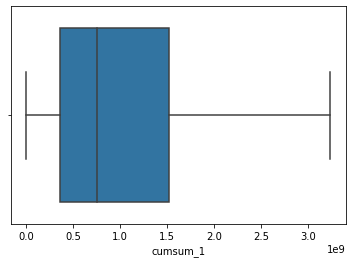

In [ ]:
sns.boxplot(x=df2['cumsum_1'])

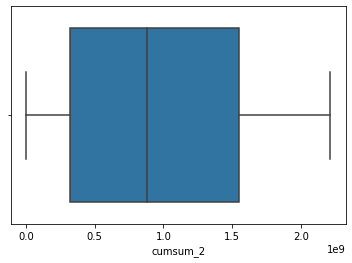

In [ ]:
sns.boxplot(x=df2['cumsum_2'])

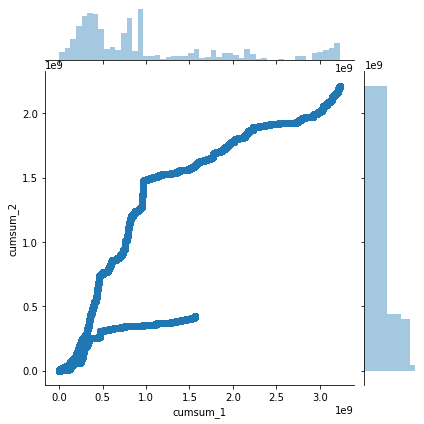

In [ ]:
sns.jointplot(x="cumsum_1", y="cumsum_2", data=df2);


,is_paid,price,num_subscribers_x,num_lectures,content_duration,year,Item_Weight,Item_MRP,num_subscribers_y,cumsum_1,cumsum_2
is_paid,1.000000,0.287807,-0.336621,0.103480,0.085635,0.028566,0.000166,-0.000358,0.000585,-0.059657,-0.041582
price,0.287807,1.000000,0.057748,0.342380,0.333969,0.080002,0.000333,-0.000878,0.001443,0.075382,0.045568
num_subscribers_x,-0.336621,0.057748,1.000000,0.137796,0.196215,-0.162620,-0.000440,0.001562,-0.002583,0.105000,0.040132
num_lectures,0.103480,0.342380,0.137796,1.000000,0.793882,0.008715,0.000276,-0.000321,0.000512,0.123012,0.108011
content_duration,0.085635,0.333969,0.196215,0.793882,1.000000,-0.090166,-0.000208,0.000832,-0.001379,0.098491,0.049697
year,0.028566,0.080002,-0.162620,0.008715,-0.090166,1.000000,0.003461,-0.010317,0.017004,0.263276,0.495563
Item_Weight,0.000166,0.000333,-0.000440,0.000276,-0.000208,0.003461,1.000000,0.041298,0.000131,0.000944,0.001885
Item_MRP,-0.000358,-0.000878,0.001562,-0.000321,0.000832,-0.010317,0.041298,1.000000,0.690013,-0.002742,-0.005257
num_subscribers_y,0.000585,0.001443,-0.002583,0.000512,-0.001379,0.017004,0.000131,0.690013,1.000000,0.004495,0.008639
cumsum_1,-0.059657,0.075382,0.105000,0.123012,0.098491,0.263276,0.000944,-0.002742,0.004495,1.000000,0.896164


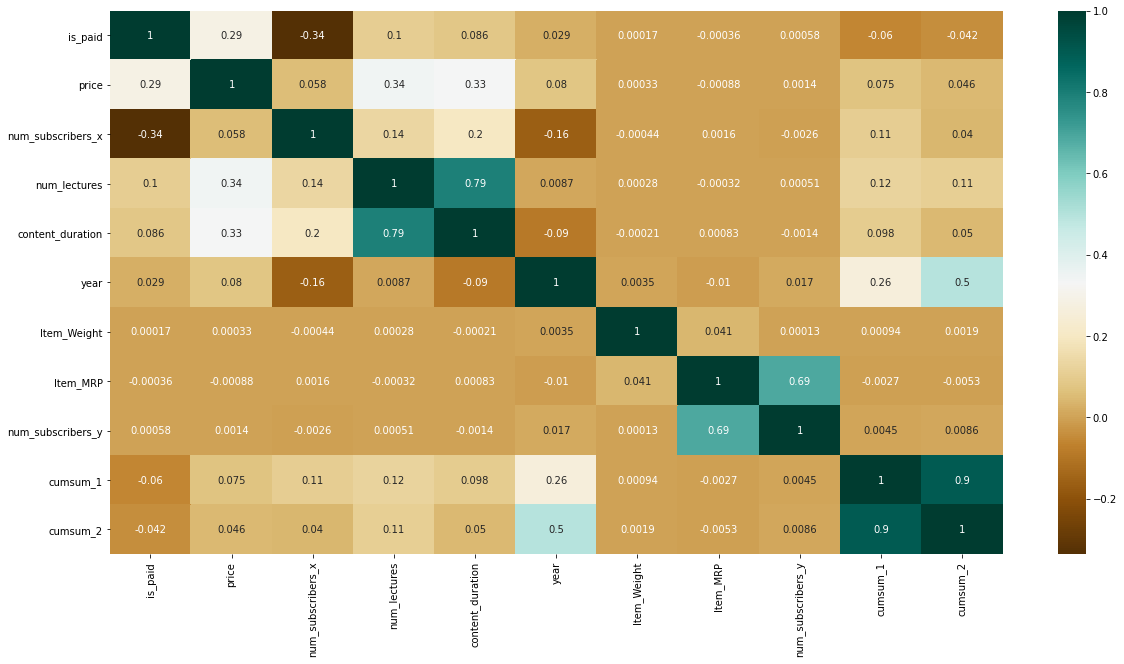

In [ ]:
plt.figure(figsize=(20,10))
cumsumheat=df2.corr()
sns.heatmap(cumsumheat,cmap="BrBG",annot=True)
cumsumheat